In [18]:
# INTRO:
# 1- Loaded pulsations in filter I from 15/11/2021 "clean I pulsations: with no transit" 
# 2- Filtered out frequencies higher than 100 d^(-1) (--> Periods shorter than 15 min)
# 3- Loaded filtered signal in Period04
# 4- Finding Frequencies, Amplitudes and Phases with Period04
# 5- First few frequencies, amplitudes and phases found with Period04
#     used to generate a synthetic pulsation signal

In [19]:
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

In [20]:
# Load I Pulsations DataFrame
pulsI_fn = "../data/data_c1c2c3/Puls/Measurements_Pulsacion_WASP33_I_space.csv"
pulsI_df = pd.read_csv(pulsI_fn, sep=" ")

# Load the Pulsations Signal acquired by Alfredo on 15/11/2021
pulsI_in_signal = np.array(pulsI_df["rel_flux_T1"])
len(pulsI_in_signal)

349

In [21]:
times = np.array(pulsI_df["J.D.-2400000"])
ti = times[0]
tf = times[len(pulsI_in_signal)-1]

acq_duration = tf - ti # Pulsations I data acquisition duration [days] on 15/11/2021 
fs = 1 / (acq_duration / len(pulsI_in_signal)) # pulsation per day
fs

3390.3244609486746

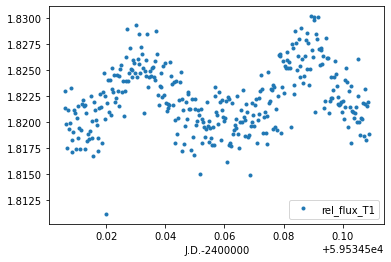

In [22]:
pulsI_df.plot(x="J.D.-2400000", 
              y="rel_flux_T1", 
              marker='.', linestyle='none');

In [23]:
cutoff = 100 # 24h/d*60min/h / 100c/d = 14.4 min/c -> cutoff periods lower than ~15min
order = 3
def butterworth_lowpass(data, fs, cutoff, order):
    nyq = fs/2
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return np.array(y)

In [24]:
filtered_Ipuls = butterworth_lowpass(pulsI_in_signal, fs, cutoff, order)

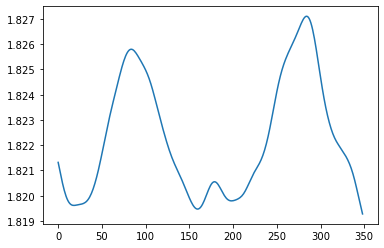

In [25]:
plt.plot(filtered_Ipuls)
pulsI_df["filtered_pulsations"] = filtered_Ipuls

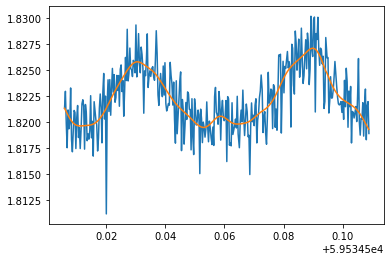

In [26]:
plt.figure(); 

plt.plot(times, pulsI_in_signal); 
plt.plot(times, filtered_Ipuls);

In [27]:
pulsI_df.to_csv(path_or_buf="../data/data_c1c2c3/Puls/filtered_pulsacionI_WASP33.csv", sep=" ")

In [28]:
# Now that the frequencies have already been deduced, we will generate the signal using 
#  the found frequencies, amplitudes and phases, to verify that the found quantities 
#  make sense.

In [29]:
def generate_signal_from_sins(times, sins):
    """
    Generate signal from a list of sinus, each of them 
    containing frequency, amplitude and phase
    """
    t = np.array(times)
    generated_pulsations = np.zeros((len(t)), dtype=np.float32)
    for sin in sins:
        f = sin[0]    
        A = sin[1]
        ph = sin[2]
        generated_pulsations = generated_pulsations + A * np.sin(2*np.pi*(f*t + ph))
    #generated_pulsations = (-1)*generated_pulsations
    return generated_pulsations

In [30]:
#Frequencies f: Units:[d^(-1)], found with Period04, for signal filtered_Ipuls

# sins: [[f, A, phase]]
sins = [[18.9430736, 0.00286821882, 0.187535], 
        [34.9718283, 0.00104724779, 0.846524],
        [10.2001166, 0.000701297333, 0.421918],
        [90.8296095, 0.000225290386, 0.500746],
        [68.9722168, 0.000190618469, 0.61093],
        [27.6860307, 0.000179667072, 0.597484],
        [61.6864193, 0.000192277955, 0.64288],
        [52.4577424, 0.000155546406, 0.399066],
        [82.5723723, 0.000106210817, 0.77114],
        [99.0868467, 3.07097218e-5, 0.209028],
        [44.2005051, 6.04210497e-5, 0.917296]]

generated_pulsations = generate_signal_from_sins(times, sins)

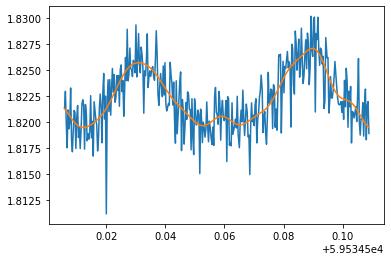

In [31]:
offset = 1.8223
plt.figure(); 

plt.plot(times, pulsI_in_signal);
plt.plot(times, offset + generated_pulsations);

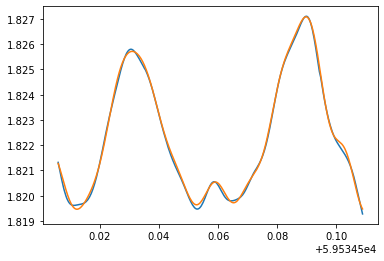

In [32]:
plt.plot(times, filtered_Ipuls); 
plt.plot(times, 1.8223 + generated_pulsations);